## Example Script for Horizontal Flipping

In [9]:
from PIL import Image, ImageSequence
import vidaug.augmentors as va
import os
import pandas as pd

In [10]:
# PATH FOLDER WITH GIFS
path = "../raw_data_gif/"

In [11]:
# FUNCTION TO READ GIF
def gif_loader(path, modality="RGB"):
    frames = []
    with open(path, 'rb') as f:
        with Image.open(f) as video:
            index = 1
            for frame in ImageSequence.Iterator(video):
                frames.append(frame.convert(modality))
                index += 1
        return frames


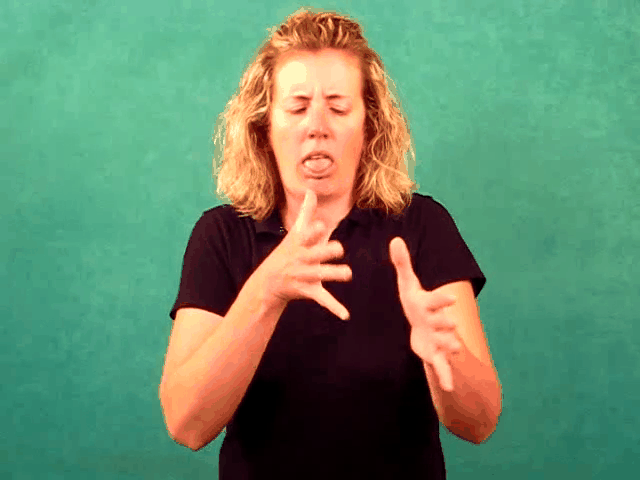

In [43]:
# TEST
frames = gif_loader(path+"61984.gif")
frames[30]

## Lista modificações:

In [12]:
# LIST OF MODIFICATIONS. CHECK DOCUMENTATION.

from fnmatch import translate


sometimes = lambda aug: va.Sometimes(1, aug) # Used to apply augmentor with 100% probability

seq1 = va.Sequential([ 
    sometimes(va.Salt()), # add granularidade
    sometimes(va.RandomRotate(degrees=10)) # horizontally flip the video with 100% probability
])

seq2 = va.Sequential([ 
    sometimes(va.InvertColor()), # mudar cor
])

seq3 = va.Sequential([ # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.RandomRotate(degrees=15)), # center crop
])

seq4 = va.Sequential([ # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.HorizontalFlip()), # inverte imagem
])

seq5 = va.Sequential([ # randomly rotates the video with a degree randomly choosen from [-10, 10]  
    sometimes(va.Salt()), # add granularidade
])

## Aplicar modificações e salvar:

In [13]:
#### DONT NEED TO RUN!
lista = []
for video in os.listdir(path):
    if video.endswith(".gif"):
        lista.append(video)

In [15]:
# VIDEOS ID
df = pd.read_csv("id_list.csv", header=0, usecols=["word", "video_id"], dtype=str)
df.head()

,word,video_id
0,headache,26835
1,headache,26836
2,headache,26837
3,headache,26838
4,headache,26839


In [16]:
# DF ONLY ID FROM SELECTED WORDS
selected_words = ['allergy', 'diarrhea', 'headache', 'tired', 'vomit']

df_imp = df[df["word"].isin(selected_words)]
df_imp.head()

,word,video_id
0,headache,26835
1,headache,26836
2,headache,26837
3,headache,26838
4,headache,26839


In [19]:
# FOR EACH VIDEO IN DF_IMP, APPLY MODIFICATION AND SAVE

from unittest import skip

for video in df_imp.video_id:
    
    try:
        frames = gif_loader(f"{path}{video}.gif")
        video_aug1 = seq1(frames)
        video_aug2 = seq2(frames)
        video_aug3 = seq3(frames)
        video_aug4 = seq4(frames)
        video_aug5 = seq5(frames)
        
        video_aug1[0].save(f"../raw_aug/{video}_aug1.gif", save_all=True, append_images=video_aug1[1:], duration=100, loop=0)
        video_aug2[0].save(f"../raw_aug/{video}_aug2.gif", save_all=True, append_images=video_aug2[1:], duration=100, loop=0)
        video_aug3[0].save(f"../raw_aug/{video}_aug3.gif", save_all=True, append_images=video_aug3[1:], duration=100, loop=0)
        video_aug4[0].save(f"../raw_aug/{video}_aug4.gif", save_all=True, append_images=video_aug4[1:], duration=100, loop=0)
        video_aug5[0].save(f"../raw_aug/{video}_aug5.gif", save_all=True, append_images=video_aug5[1:], duration=100, loop=0)


    except:
        skip
        
